# Using Interact

The `interact` function (`ipywidgets.interact`) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython's widgets.

In [1]:
from __future__ import print_function # for python 2
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

## Basic `interact`

At the most basic level, `interact` autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use `interact`, you need to define a function that you want to explore. Here is a function that prints its only argument `x`.

In [2]:
def f(x):
    print(x)

In [3]:
f(10)

10


When you pass this function as the first argument to `interact` along with an integer keyword argument (`x=10`), a slider is generated and bound to the function.

In [4]:
interact(f, x=10);

10


When you move the slider, the function is called and the current value of `x` is printed.

If you pass `True` or `False`, `interact` will generate a checkbox:

In [5]:
interact(f, x=True);

True


If you pass a string, `interact` will generate a text area.

In [6]:
interact(f, x='Hi there!');

Hi there!


`interact` can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows, `interact` also works with functions that have multiple arguments.

In [7]:
@interact(x=True, y=1.0)
def g(x, y):
    print(x, y)

True 1.0


## Fixing arguments using `fixed`

There are times when you may want to explore a function using `interact`, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the `fixed` function.

In [8]:
def h(p, q):
    print(p, q)

In [9]:
h(5, 10)

5 10


When we call `interact`, we pass `fixed(20)` for q to hold it fixed at a value of `20`.

In [10]:
interact(h, p=5, q=fixed(20));

5 20


Notice that a slider is only produced for `p` since the value of `q` is fixed.

## Widget creation

The `interact` function tries to guess which type of control you want based on the value you pass in to the `interact` function.  When you pass an integer argument to `interact`, such as `interact(f, x=10)`, an integer-valued slider control is generated centered at the value:

```python
widgets.IntSlider(min=-10,max=30,step=1,value=10)
```

We can also directly create the widget when calling `interact`, rather than having `interact` guess:

In [11]:
interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10));

10


This examples clarifies how `interact` processes its keyword arguments:

1. If the keyword argument is a `Widget` instance with a `value` attribute, the widget is used. Any widget with a `value` attribute can be used, even custom ones.
2. Otherwise, the value is used to guess a correct a widget, which is used.

The following table gives an overview of `interact` translates arguments into widgets:

<table class="table table-condensed table-bordered">
  <tr><td><strong>Keyword argument</strong></td><td><strong>Widget</strong></td></tr>  
  <tr><td>`True` or `False`</td><td>Checkbox</td></tr>  
  <tr><td>string `'Hi there'`</td><td>Textarea</td></tr>
  <tr><td>numeric `value` or `(min,max)` or `(min,max,step)`</td><td>IntSlider or FloatSlider</td></tr>
  <tr><td>`('orange','apple')` or `{'one':1,'two':2}`</td><td>Dropdown</td></tr>
</table>

You have seen how the checkbox and textarea widgets work above. Here, more details about the different abbreviations for sliders and dropdowns are given.

If a 2-tuple of integers is passed, `(min,max)`, a integer-valued slider is produced with those minimum and maximum (inclusive) values. In this case, the default step size of `1` is used.

In [12]:
interact(f, x=(0,4));

2


If a 3-tuple of integers is passed `(min,max,step)`, the step size is set.

In [13]:
interact(f, x=(0,8,2));

4


A float-valued slider is produced if the elements of the tuples are floats. Here the minimum is `0.0`, the maximum is `10.0` and step size is `0.1` (the default).

In [14]:
interact(f, x=(0.0,10.0));

5.0


The step size can be changed by passing a 3-element tuple.  The length of the slider may necessitate skipping some steps if there are two many to fit.

In [15]:
interact(f, x=(0.0,10.0,0.01));

4.99


For both integer and float-valued sliders, the initial value is the default value of the function parameter, if it exists. Here we set the initial value of a float slider to `5.5`.

In [16]:
@interact(x=(0.0,20.0,0.5))
def h(x=5.5):
    print(x)

5.5


Dropdown menus can be produced by passing a tuple of strings. In this case, the strings are  used both as the names in the dropdown menu UI and passed to the underlying Python function.

In [17]:
interact(f, x=('apples','oranges'));

apples


If you want a dropdown menu that passes non-string values to the Python function, you can pass a dictionary. The keys in the dictionary are used for the names in the dropdown menu UI and the values are the arguments that are passed to the underlying Python function.

In [18]:
from collections import OrderedDict
interact(f, x={'a': 10, 'b': 20});

10


## `interactive`

In addition to `interact`, IPython provides another function, `interactive`, that is useful when you want to reuse the widgets that are produced or access the data that is bound to the UI controls.

Here is a function that returns the sum of its two arguments.

In [19]:
def f(a, b):
    return a+b

In [20]:
f(1,2)

3

Unlike `interact`, `interactive` returns a `Widget` instance rather than immediately displaying the widget.

In [21]:
w = interactive(f, a=10, b=20)

The widget is a `Box`, which is a container for other widgets.

In [22]:
type(w)

ipywidgets.widgets.widget_box.Box

The children of the `Box` are two integer valued sliders produced by the widget abbreviations above.

In [23]:
w.children

(<ipywidgets.widgets.widget_int.IntSlider at 0x10ebaf048>,
 <ipywidgets.widgets.widget_int.IntSlider at 0x10ebaf390>)

To actually display the widgets, you can use IPython's `display` function.

In [24]:
from IPython.display import display
display(w)

30

At this point, the UI controls work just like they would if `interact` had been used. You can manipulate them interactively and the function will be called. However, the widget instance returned by `interactive` also gives you access to the current keyword arguments and return value of the underlying Python function.

Here are the current keyword arguments. If you rerun this cell after manipulating the sliders, the values will have changed.

In [25]:
w.kwargs

{'a': 10, 'b': 20}

Here is the current return value of the function.

In [26]:
w.result

30

In [27]:
display(w)

30

## Application

Pick a smoothing window for noisy data

In [28]:
%matplotlib inline

import numpy as np
np.random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt

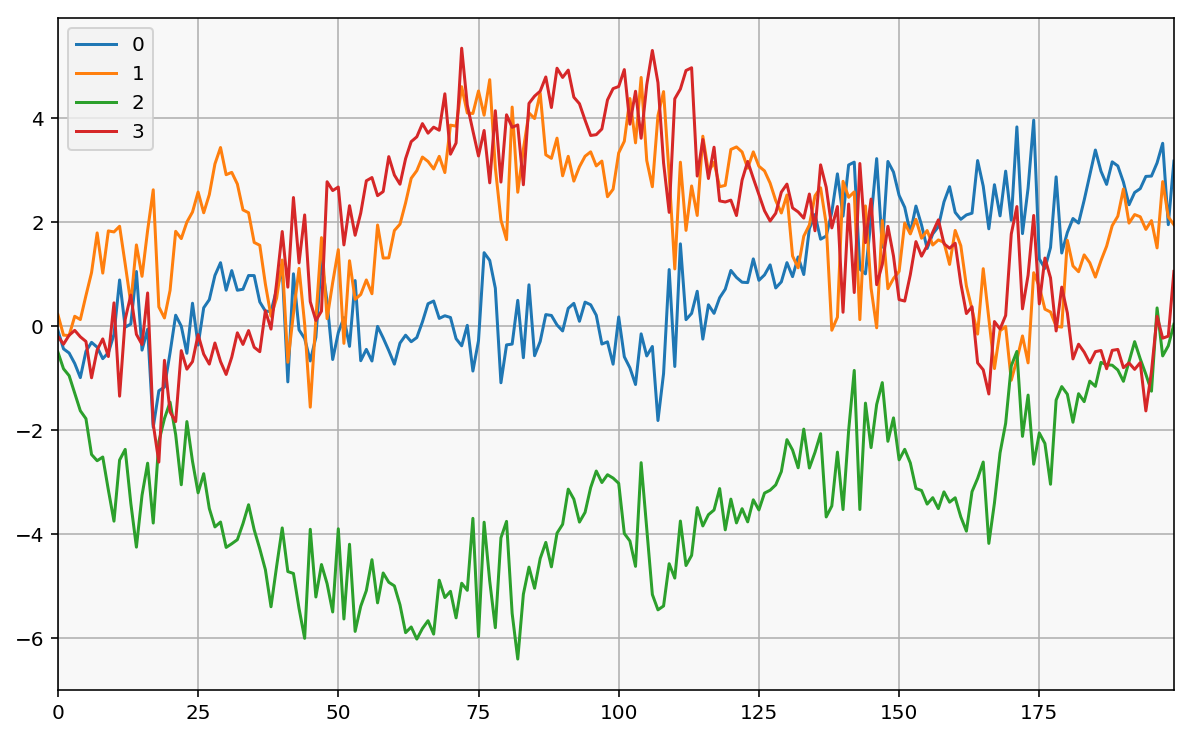

In [29]:
shape = (200, 4)
t = np.linspace(0, 20, shape[0])
source = (np.random.random(shape) - 0.5).cumsum(axis=0)
noise = 3 * (np.random.random(shape) - 0.5) * np.tile(np.sin(t)**2, (4, 1)).T
df = pd.DataFrame(source + noise)
df.plot()

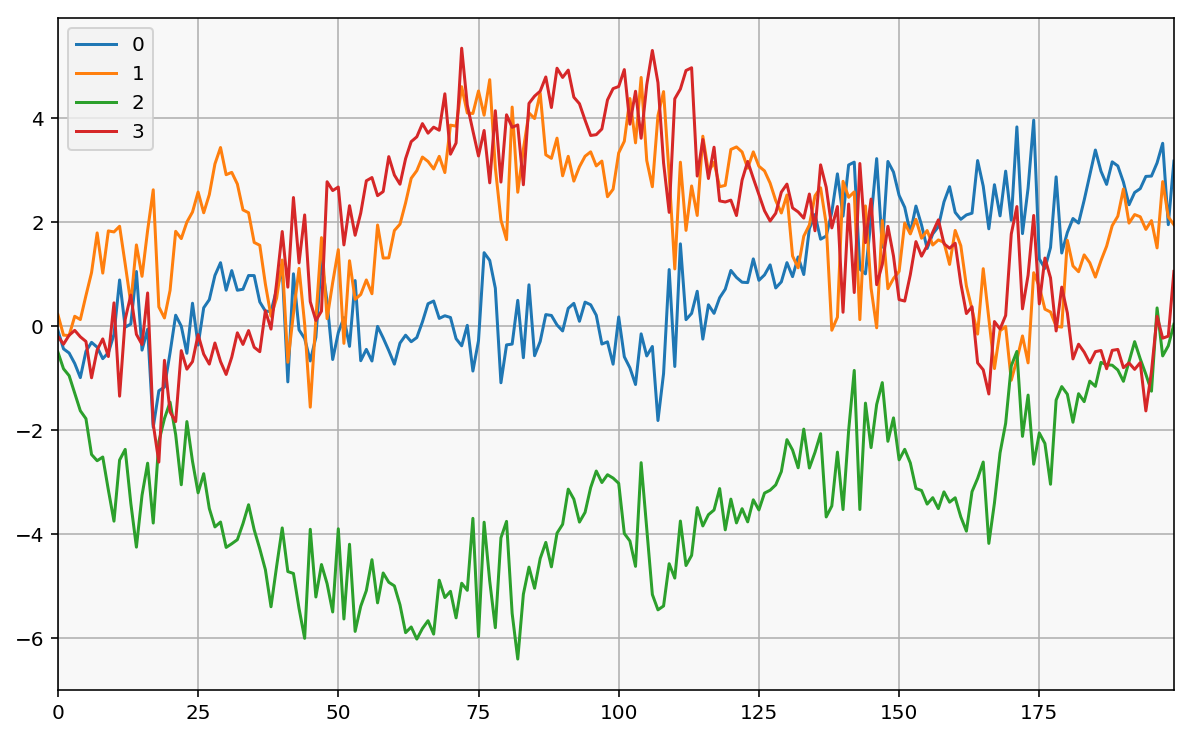

In [30]:
@interact(window=(1,20))
def smooth_plot(window=1):
    df.rolling(window).mean().plot()